In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding and Cleaning

In [3]:
df = pd.read_csv("index.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [5]:
df['datetime'] = pd.to_datetime(df['datetime']) # changing datetime to its datatype
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


In [7]:
df.describe() # statistical measures of numerical columns

,date,datetime,money
count,1133,1133,1133.000000
mean,2024-05-19 11:36:29.232127232,2024-05-20 02:38:39.053382912,33.105808
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-04-14 00:00:00,2024-04-14 10:55:27.406000128,28.900000
50%,2024-05-23 00:00:00,2024-05-23 12:22:06.604999936,32.820000
75%,2024-06-22 00:00:00,2024-06-22 08:39:50.272999936,37.720000
max,2024-07-31 00:00:00,2024-07-31 21:55:16.570000,40.000000
std,NaN,NaN,5.035366


In [8]:
df.shape

(1133, 6)

In [9]:
df.isna().sum() # to check number of null values

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [10]:
df['card']= df['card'].fillna(df['card'].mode()[0]) # Filling null values with mode

In [11]:
df.isna().sum() # verifying

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [12]:
df.duplicated().sum() # checking for duplicated values

0

# Feature Engineering

In [14]:
df['Month'] = df['date'].dt.month # extracting month out of datetime column

In [15]:
df['Year'] = df['date'].dt.year # Extracting year out of datetime column

In [16]:
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month

In [17]:
df.drop(columns=['date'], inplace=True) # dropping the datetime cloumn 

In [18]:
df.head()

,datetime,cash_type,card,money,coffee_name,Month,Year,hour,weekday,month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,2024,10,4,3
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,2024,12,4,3
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,2024,12,4,3
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,2024,13,4,3
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,2024,13,4,3


# Exploratory Data Analysis

### Money spent in each month of the year

In [21]:
df.groupby(['Year','Month'])['money'].sum()

Year  Month
2024  3        7050.20
      4        6720.56
      5        9063.42
      6        7758.76
      7        6915.94
Name: money, dtype: float64

### Monthly Sales Trend

In [23]:
monthly_sales = df.groupby('Month')['money'].sum().reset_index()

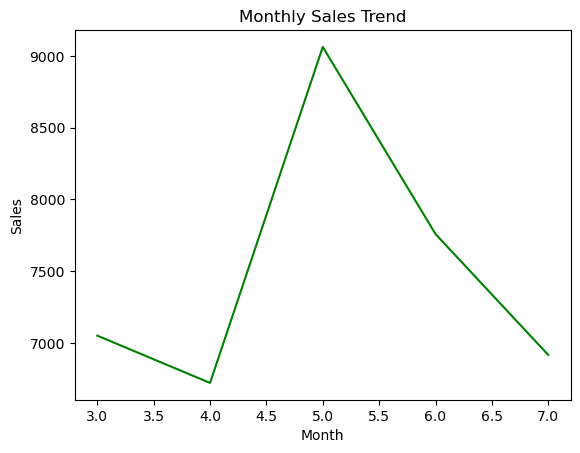

In [24]:
sns.lineplot(data=monthly_sales, x='Month', y='money', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### Drink Popularity

In [26]:
popular_drink = df['coffee_name'].value_counts().sort_values(ascending=False).head().reset_index()
popular_drink

,coffee_name,count
0,Americano with Milk,268
1,Latte,243
2,Cappuccino,196
3,Americano,169
4,Cortado,99


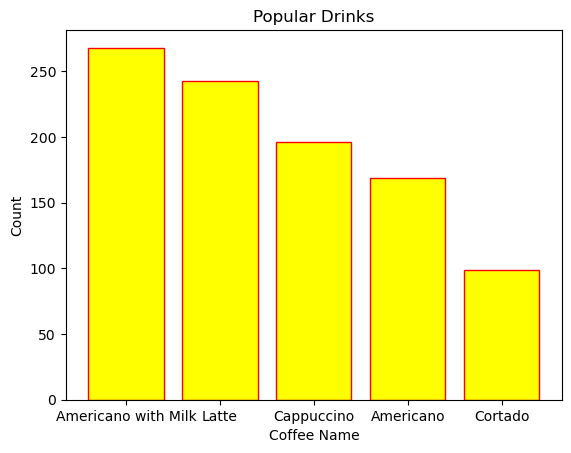

In [27]:
plt.bar(data = popular_drink, x = 'coffee_name', height = 'count', color='yellow', edgecolor='red')
plt.xlabel('Coffee Name')
plt.ylabel('Count')
plt.title('Popular Drinks')
plt.show()

### Sales by Product

In [29]:
product_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=True).tail(5).reset_index()
product_sales

,coffee_name,money
0,Hot Chocolate,2778.48
1,Americano,4644.54
2,Cappuccino,7333.14
3,Americano with Milk,8601.94
4,Latte,9009.14


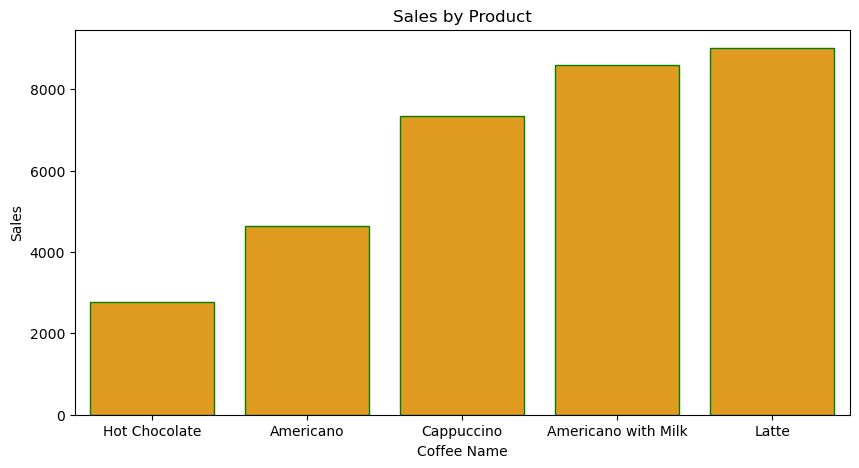

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_sales, x = 'coffee_name', y = 'money', color = 'orange', edgecolor = 'green')
plt.title('Sales by Product')
plt.xlabel('Coffee Name')
plt.ylabel('Sales')
plt.show()

# Machine Learning

In [60]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()
df['coffee_label'] = le.fit_transform(df['coffee_name'])

In [68]:
X = df[['hour', 'weekday', 'month', 'money']]
y = df['coffee_label']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [76]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
from sklearn.metrics import accuracy_score

In [84]:
y_pred = model.predict(X_test)

In [96]:
print(f"{round(accuracy_score(y_test, y_pred) * 100,2)}%")

60.49%
